### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import os
ldir = os.chdir(r'C:\Users\Gergely\Downloads')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

### Adatok beolvasása

In [2]:
df = pd.read_csv('Lab1data.txt', header=None, names=['X', 'y'])
print(df.shape)
df.head()

(97, 2)


,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Adatok ábrázolása

Text(0, 0.5, 'Profit in $10 000s ')

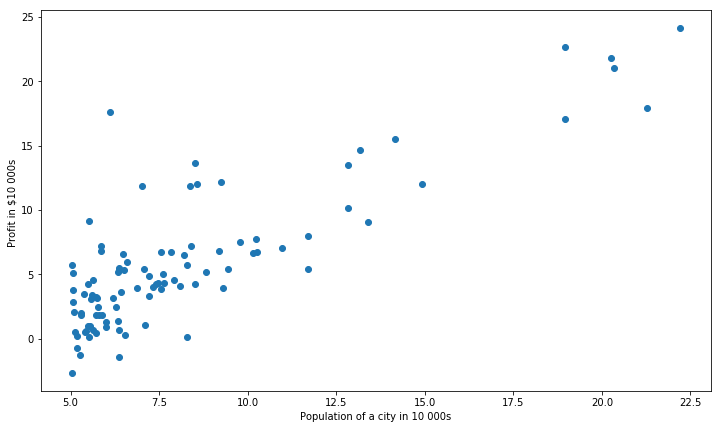

In [3]:
plt.figure(figsize=(12, 7))
plt.scatter(df.X, df.y)
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")

### Gradiens csökkentő algoritmus

In [4]:
b0 = 0 #b0 kezdeti értéke
b1 = 0 #b1 kezdeti értéke

def y_kalap(b0, b1, x):
    return np.array(b0 + np.array(x)*b1)

def gradient_descent_ciklus(b0, b1, x, y, ciklusok_száma, alpha):
    hibakovetes = []
    for i in range(ciklusok_száma):
        #együtthatók parciális deriváltjainak kiszámítása
        db0 = np.sum(y_kalap(b0, b1, x) - np.array(y))
        db1 = np.sum((y_kalap(b0, b1, x) - np.array(y))*np.array(x))

        #együtthatók értékeinek frissítése
        b0 = b0 - db0*alpha
        b1 = b1 - db1*alpha
        
        #y_ regresszió függvény frissítése és hiba újraszámolása
        y_ = y_kalap(b0, b1, x)
        negyzetes_hiba = np.sum((np.array(y_) - np.array(y))**2)
        hibakovetes.append(negyzetes_hiba)
      
    #Regresszió függvény ábrázolása
    plt.figure(figsize=(12, 7))
    plt.scatter(x, y, label=None) 
    plt.plot(x, y_, color='orange', label=('y_ = {0:.2f}'.format(b0),' + ','{0:.2f}'.format(b1), 'X'))
    plt.legend()
    
    print('B0:', b0)
    print('B1:', b1)
    print('\nÖsszes négyzetes hiba: ', negyzetes_hiba)
    print('Átlagos hiba: ', np.sum(np.abs(np.array(y_) - np.array(y)))/len(x))
    
    return b0, b1, hibakovetes

### Gradiens csökkentő függvény hívása

B0: -3.7757424457057134
B1: 1.180974481599217

Összes négyzetes hiba:  868.7869375838642
Átlagos hiba:  2.201728495573746


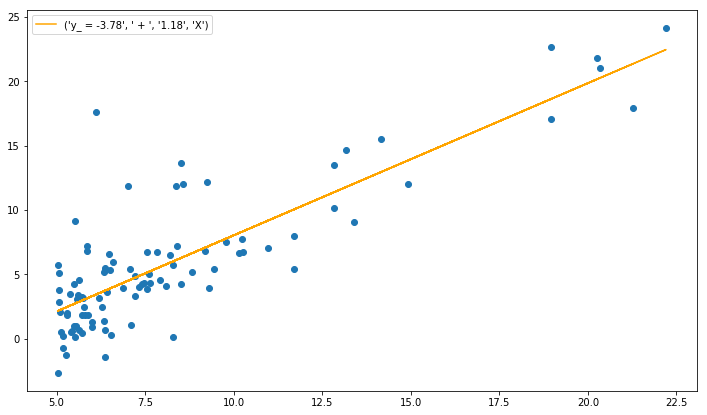

In [5]:
b0, b1, hibák = gradient_descent_ciklus(b0, b1, df.X, df.y, 2000, 0.0001)

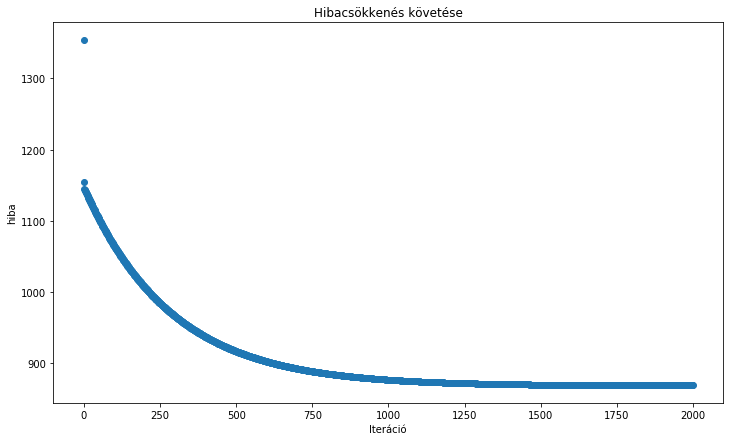

In [6]:
plt.figure(figsize=(12, 7))
plt.scatter(np.array([x for x in range(len(hibák))]), hibák)
plt.title('Hibacsökkenés követése')
plt.xlabel('Iteráció')
plt.ylabel('hiba')
plt.show()

### Ellenőrzés

LinregressResult(slope=1.193033644189594, intercept=-3.8957808783118537, rvalue=0.8378732325263409, pvalue=1.0232099778760961e-26, stderr=0.07974394383258741)


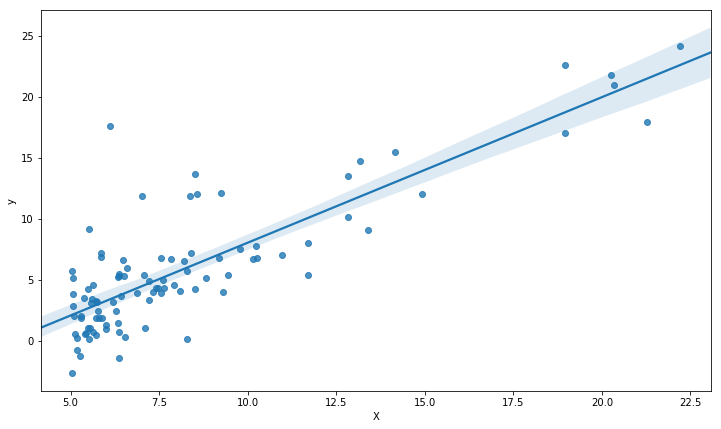

In [7]:
print(stats.linregress(df.X, df.y))

plt.figure(figsize=(12, 7))
sns.regplot(df.X, df.y)

### Prediction

In [8]:
def predict(x):
    return b0 + b1*x

print('Prediction for 10 000 citizens: ', predict(10)*10000)
print('Prediction for 10 000 citizens: ', predict(17)*10000)

Prediction for 10 000 citizens:  80340.02370286455
Prediction for 10 000 citizens:  163008.23741480976


###  
###  
### Másik megoldás

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

In [10]:
file=open('Lab1data.txt','r')
lines=file.readlines()
file.close()

In [11]:
X=[] # listák definiálása
Y=[]
for line in lines: # Soronként végigmegyünk a beolvasott adatokon
    a,b = line.split(',') # és szétdaraboljuk az elválasztó karakternek megfele
    X.append(float (a))
    Y.append(float(b))
X=np.array(X) # Numpy tömbbé alakítjuk az adatainkat
Y=np.array(Y)
m=Y.size
X=X.reshape(m,1)
Y=Y.reshape(m,1)
print('X dimenziója:', X.shape, '; X értékei:\n', X, '\n')
print('Y dimenziója:', Y.shape, '; Y értékei:\n', Y, '\n')
print('Az adatok száma: ', m)

X dimenziója: (97, 1) ; X értékei:
 [[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.00

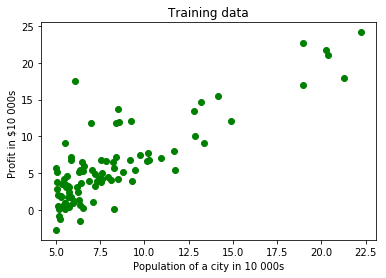

In [12]:
plt.plot(X,Y,'o', c= "g")
plt.title("Training data")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.show()

In [13]:
# W inicializálása, X bővítése
######################################################
W = np.array([0, 0]).reshape(2, 1)
X = np.column_stack((np.ones(m), X))
######################################################

In [14]:
print('X dimenziója:\n', X.shape)
print('Y dimenziója:\n', Y.shape)
print('W dimenziója:\n', W.shape)

X dimenziója:
 (97, 2)
Y dimenziója:
 (97, 1)
W dimenziója:
 (2, 1)


In [15]:
def computeCost(X, Y, W):
######################################################
    C = (1/(2*m))*np.sum((W[0, 0] + W[1, 0]*X[:, 1] - np.array(Y[:, 0]))**2)
######################################################
    return C

In [16]:
C1 = computeCost(X, Y, np.array([[0],[0]]).reshape((2, 1)))
print('''Teszt (Cost function):
\tSúlyok: W = [0;0]
\tElvárt érték (közelítve) = 32.07
\tSzámolt érték = ''',C1)

C2 = computeCost(X, Y, np.array([[-1],[2]]))
print('''\n\tSúlyok: W = [-1;2]
\tElvárt érték (közelítve) = 54.24
\tSzámolt érték = ''',C2)

if int(C1) == 32 and int(C2) ==54:
    print("\n A computeCost függvény megfelelő. Tovább mehet.")
else:
    print("\n Valami nem stimmel. Korrekció szükséges!")

Teszt (Cost function):
	Súlyok: W = [0;0]
	Elvárt érték (közelítve) = 32.07
	Számolt érték =  32.072733877455676

	Súlyok: W = [-1;2]
	Elvárt érték (közelítve) = 54.24
	Számolt érték =  54.24245508201238

 A computeCost függvény megfelelő. Tovább mehet.


In [17]:
epochs = 1500
learning_rate = 0.01

In [18]:
def gradientDescent(X, Y, W, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros((epochs, 1))
###################################################### #VIGYÁZAT szimultán update!!!!!
    for i in range(epochs):
        dW0 = np.sum(X@W - Y)
        dW1 = np.sum((X@W - Y)*X)

        W = np.array([W[0, 0] - dW0*(learning_rate/m), W[1, 0] - dW1*(learning_rate/m)]).reshape(2, 1)
        C_history[i] = computeCost(X, Y, W)        
######################################################
    return W, C_history

In [19]:
print('''\n gradientDescent() függvény teszt (learning_rate=0.01):
\tWeights expected (approx.):
\t [-3.6303] [1.1664]''')
W, C_history = gradientDescent(X, Y, W, learning_rate, epochs)
print('\tWeights calculated:\n\t',W[0],W[1])

if (W[0]+3.6303) < 0.1 and (W[1]-1.1664) < 0.1:
    print("\n A gradientDescent függvény megfelelő. Tovább mehet.")
else:
    print("\n Valami nem stimmel. Korrekció szükséges!")


 gradientDescent() függvény teszt (learning_rate=0.01):
	Weights expected (approx.):
	 [-3.6303] [1.1664]
	Weights calculated:
	 [-3.55727301] [1.15835051]

 A gradientDescent függvény megfelelő. Tovább mehet.


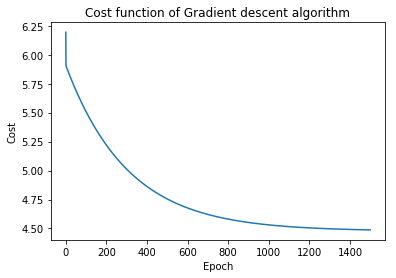

In [20]:
plt.plot(C_history)
plt.title("Cost function of Gradient descent algorithm")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

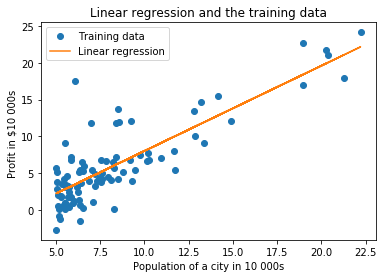

In [21]:
plt.plot((X[:,1]).reshape(97,1),Y,'o', label = "Training data")
plt.plot((X[:,1]).reshape(97,1),X@W,'-',label = "Linear regression")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

In [22]:
Prediction1 = (np.array([1, 10]))@W
Prediction2 = (np.array([1, 17]))@W
print('\nPrediction for 10 000 citizens: %.2f $' % (Prediction1 * 10000))
print('\nPrediction for 17 000 citizens: %.2f $' % (Prediction2 * 10000))


Prediction for 10 000 citizens: 80262.32 $

Prediction for 17 000 citizens: 161346.86 $


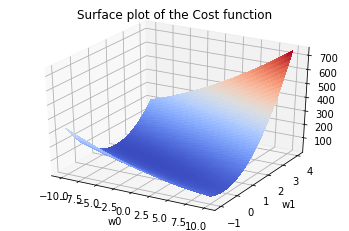

In [23]:
w0_vals = np.linspace(-10,10,100)
w1_vals = np.linspace(-1,4,100)
C_vals = np.zeros((w0_vals.size,w1_vals.size))
for i in range((w0_vals).size):
    for j in range((w1_vals).size):
        t=np.array([w0_vals[i],w1_vals[j]]).reshape(2,1)
        C_vals[[i],[j]]= computeCost(X,Y,t)
C_vals=C_vals.T
fig= plt.figure()
ax=plt.axes(projection='3d')
x, y = np.meshgrid(w0_vals, w1_vals)
surf = ax.plot_surface(x, y, C_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Surface plot of the Cost function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

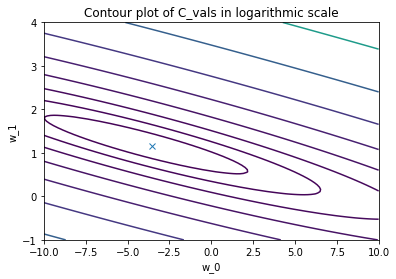

In [24]:
plt.contour(w0_vals,w1_vals,C_vals,np.logspace(-2,3,20))
plt.plot(W[0],W[1],'x')
plt.title("Contour plot of C_vals in logarithmic scale")
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()